### IDs:
Insert yours IDs to the cell below

ID #1:052327558

ID #2:301833836


## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. You are free to add cells.
1. Write your functions and your answers in this jupyter notebook only.
1. Answers to theoretical questions should be written in **markdown cells (with $\LaTeX$ support)**.
1. Submit this jupyter notebook only using your ID as a filename. Not to use ZIP or RAR. For example, your Moodle submission file name should look like this (two id numbers): `123456789_987654321.ipynb`.

### Question 1 - Correlations (15 points)

Provide example datapoints matching the following descriptions. Each example should be constructed over n=50 datapoints. Provide a table description of the example data as well as a scatter plot. If you think that the situation described is impossible then clearly explain why (you don’t need to give a rigorous proof).<br>
Pearson(x,y) = Pearson correlation<br>
τ(x,y) = Kendall rank correlation<br>
ρ(x,y) = Spearman rank correlation <br>

#### 1.A
Data in which the Pearson(x,y)>0.9 but where n-1 points can be selected so that for the vectors restricted to those we have Pearson correlation <0.1

### Answer 1.A

In [74]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import kendalltau, spearmanr, lognorm, pearsonr
import scipy.stats as stats
import seaborn as sns

In [18]:
def get_pearson_corr(x,y):
    return np.round(np.corrcoef(x,y)[0,1], 2)

In [19]:
n = 50
x = np.ones((n))
y = np.arange(n) + 1

# An outlier that will increase pearson's correlation
x[0] = 250
y[0] = 259

# A point that will prevent a variance of 0 on the x axis
x[1] = 6
y[1] = 6

# table of the whole data
df_all_data = pd.DataFrame(np.vstack((x,y)).T, columns = ["x", "y"])
df_all_data

,x,y
0,250.0,259.0
1,6.0,6.0
2,1.0,3.0
3,1.0,4.0
4,1.0,5.0
5,1.0,6.0
6,1.0,7.0
7,1.0,8.0
8,1.0,9.0
9,1.0,10.0


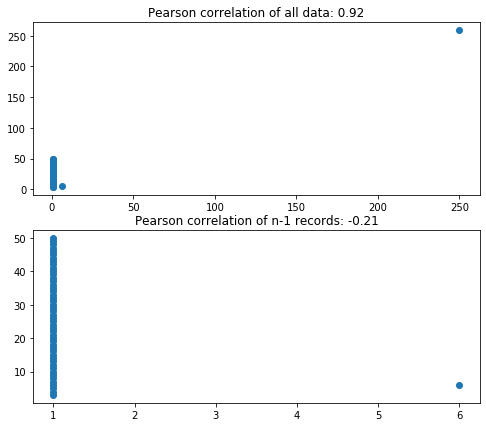

In [22]:
# Calculate pearson correlation
pearson_all = get_pearson_corr(x,y)
pearson_subset = get_pearson_corr(x[1:],y[1:])

fig, ax = plt.subplots(2, 1, figsize = (8,7))
ax[0].plot(x, y, 'o')
ax[0].set_title(f"Pearson correlation of all data: {pearson_all}")
ax[1].plot(x[1:], y[1:], 'o')
ax[1].set_title(f"Pearson correlation of n-1 records: {pearson_subset}")

assert(pearson_all > 0.9)
assert(pearson_subset < 0.1) 

#### 1.B
Data with τ(x,y) > ρ(x,y) + 0.4 

### Answer 1.B

In [26]:
def get_kendall_corr(x,y):
    return np.round(kendalltau(x,y)[0], 2)

def get_spearman_corr(x, y):
    return np.round(spearmanr(x, y)[0], 2)

x = np.arange(n)
y = np.ones((50))

y[0:15] = np.arange(15) + 40
y[15:30] = np.arange(15) + 20
y[30:] = np.arange(20) + 3

df_all_data = pd.DataFrame(np.vstack((x,y)).T, columns = ["x", "y"])
df_all_data



,x,y
0,0.0,40.0
1,1.0,41.0
2,2.0,42.0
3,3.0,43.0
4,4.0,44.0
5,5.0,45.0
6,6.0,46.0
7,7.0,47.0
8,8.0,48.0
9,9.0,49.0


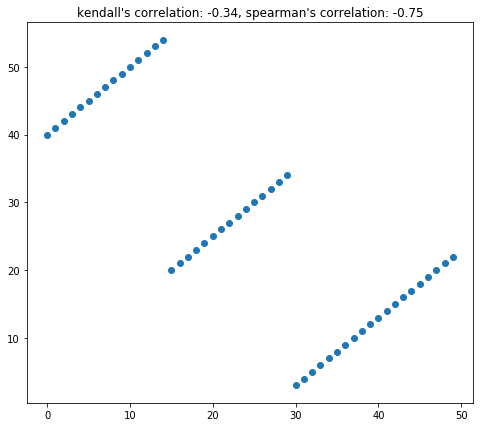

In [27]:
kendall_corr = get_kendall_corr(x,y)
spearman_corr = get_spearman_corr(x,y)

plt.figure(figsize=(8,7))
plt.scatter(x,y)
plt.title(f"kendall's correlation: {kendall_corr}, spearman's correlation: {spearman_corr}")

assert(kendall_corr > spearman_corr + 0.4)

#### 1.C
Data with τ(x,y) < ρ(x,y) – 0.4 

### Answer 1.C

In [28]:
x = np.arange(n)
y = np.ones((50))

y[0:15] = np.flip(np.arange(15)) + 3
y[15:30] = np.flip(np.arange(15)) + 20
y[30:] = np.flip(np.arange(20))+ 40

df_all_data = pd.DataFrame(np.vstack((x,y)).T, columns = ["x", "y"])
df_all_data

,x,y
0,0.0,17.0
1,1.0,16.0
2,2.0,15.0
3,3.0,14.0
4,4.0,13.0
5,5.0,12.0
6,6.0,11.0
7,7.0,10.0
8,8.0,9.0
9,9.0,8.0


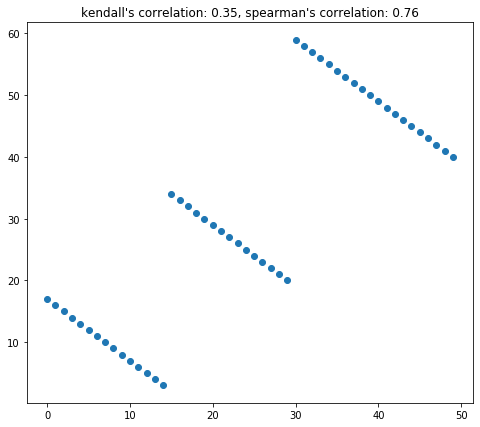

In [29]:
kendall_corr = get_kendall_corr(x,y)
spearman_corr = get_spearman_corr(x,y)

plt.figure(figsize=(8,7))
plt.scatter(x,y)
plt.title(f"kendall's correlation: {kendall_corr}, spearman's correlation: {spearman_corr}")

assert(kendall_corr < spearman_corr - 0.4)

#### 1.D
Data with Pearson(x,y) < ρ(x,y) – 0.6

### Answer 1.D

In [30]:
x = np.arange(n)
y = np.exp(x)

df_all_data = pd.DataFrame(np.vstack((x,y)).T, columns = ["x", "y"])
df_all_data

,x,y
0,0.0,1.000000e+00
1,1.0,2.718282e+00
2,2.0,7.389056e+00
3,3.0,2.008554e+01
4,4.0,5.459815e+01
5,5.0,1.484132e+02
6,6.0,4.034288e+02
7,7.0,1.096633e+03
8,8.0,2.980958e+03
9,9.0,8.103084e+03


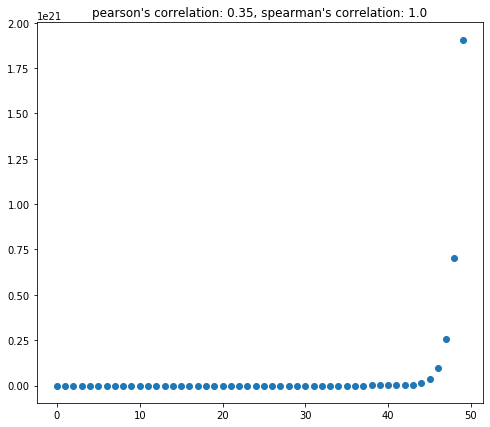

In [31]:
pearson_corr = get_pearson_corr(x,y)
spearman_corr = get_spearman_corr(x,y)

plt.figure(figsize=(8,7))
plt.scatter(x,y)
plt.title(f"pearson's correlation: {pearson_corr}, spearman's correlation: {spearman_corr}")

assert(pearson_corr < spearman_corr - 0.6)

#### 1.E
Data with Pearson(x,y) < ρ(x,y) – 1.2

### Answer 1.E

In [35]:
x = np.arange(n) + 20
y = np.linspace(1,2,50)

# make the pearson correlation negative
x[0] = 1
y[0] = 100

df_all_data = pd.DataFrame(np.vstack((x,y)).T, columns = ["x", "y"])
df_all_data


,x,y
0,1.0,100.000000
1,21.0,1.020408
2,22.0,1.040816
3,23.0,1.061224
4,24.0,1.081633
5,25.0,1.102041
6,26.0,1.122449
7,27.0,1.142857
8,28.0,1.163265
9,29.0,1.183673


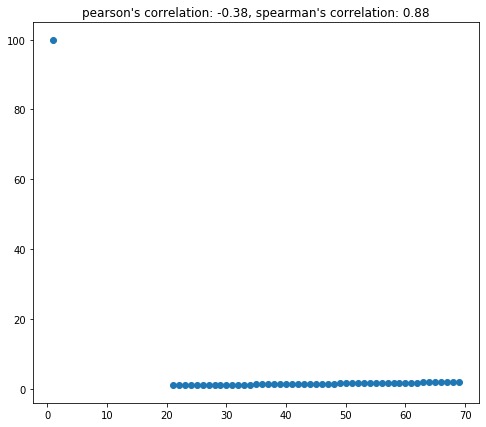

In [36]:
pearson_corr = get_pearson_corr(x,y)
spearman_corr = get_spearman_corr(x,y)

plt.figure(figsize=(8,7))
plt.scatter(x,y)
plt.title(f"pearson's correlation: {pearson_corr}, spearman's correlation: {spearman_corr}")

assert(pearson_corr < spearman_corr - 1.2)

#### 1.F
Data with τ(x,y) < ρ(x,y) – 1.2 

# Need to do this one !!!! 

### Question 2 - Analysis of the Indian Liver Patient Dataset (50 points)

Perform data analysis on the Indian Liver Patient Dataset
References:
* Bendi Venkata Ramana, Prof. M. S. Prasad Babu and Prof. N. B. Venkateswarlu, A Critical Comparative Study of Liver Patients from USA and INDIA: An Exploratory Analysis, International Journal of Computer Science Issues, ISSN :1694-0784, May 2012. 
* Bendi Venkata Ramana, Prof. M. S. Prasad Babu and Prof. N. B. Venkateswarlu, A Critical Study of Selected Classification Algorithms for Liver Disease Diagnosis, International Journal of Database Management Systems (IJDMS), Vol.3, No.2, ISSN : 0975-5705, PP 101-114, May 2011.

Use the following link to find the details of the data: https://archive.ics.uci.edu/ml/datasets/ILPD+(Indian+Liver+Patient+Dataset)

In the follwong cells write a report for your analysis. In your report provide a clear description of the analysis methods and of the results. This should include a graphical representation of the results and the conclusions. Provide p-values or other indicators of the statistical significance where appropriate. <br>
Design your report to be concise but still cover interesting findings.

There are missing values in the data. Find them and impute them by using the median value of the relevant feature (column).
Address the following questions:
* Using confidence intervals determine features for which you can state with confidence of 95% that the healthy population mean is larger/smaller than the disease population mean. 
* Draw histograms for each numerical feature. Inspect the observed distributions and then use MLE to plot, on the same figures, fits of the distributions.
* For each pair of numerical feature, calculate correlations and indicate whether you find them significant. For select pairs, with significant correlations, draw joint plot with marginal histograms (see Seaborn joint plot) and find bivariate normal fits. Then use the example code below to draw plots of the bivariate pdfs (you may edit the code as you see fit).
* Are there pairs that are significantly correlated in males but not in females? The opposite? How about healthy vs disease? Can you graphically represent this?
* For each numerical feature, except age, plot the distribution for this feature against bins of age. In each bin provide a split violin plot, with different colors for healthy and disease.

Suggest, state and address at least one original question.


In [61]:
# load dataframe
data = pd.read_csv(r"C:\IDC\second year\Statistics and Data Analysis\SnDA\ex3\Indian Liver Patient Dataset (ILPD).csv",
                   names=['age', 'gender', 'tb', 'db', 'alkphos', 'sgpt', 'sgot', 'tp', 'alb', 'a/g_ratio', 'class'],
                   index_col=False)
data["class"] = data["class"].map({1:"ill", 2:"healthy"})
nan_values = data.isnull().sum()
nan_values


age          0
gender       0
tb           0
db           0
alkphos      0
sgpt         0
sgot         0
tp           0
alb          0
a/g_ratio    4
class        0
dtype: int64

In [62]:
# As we can see, there are 4 missing values in a/g ratio. we will fill them with the median value
data.fillna(data.median(), inplace=True)
nan_values = data.isnull().sum()
nan_values


age          0
gender       0
tb           0
db           0
alkphos      0
sgpt         0
sgot         0
tp           0
alb          0
a/g_ratio    0
class        0
dtype: int64

In [63]:
# Lets analyze the data
data.describe()


,age,tb,db,alkphos,sgpt,sgot,tp,alb,a/g_ratio
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.946947
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.318495
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000


Text(0.5, 1, 'Distribution of the disease across gender')

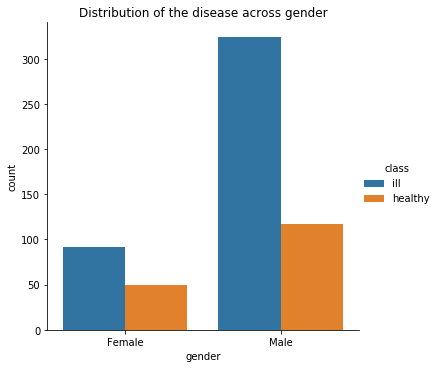

In [64]:
# We will present the distribution of the disease across gender
sns.catplot("gender", data=data, hue="class", kind="count")
plt.title(r"Distribution of the disease across gender")


In [65]:
# We can see that the disease is much more prevalent in males


## Confidence interval


In [66]:
# get numeric columns
numerics = ["int64", "float64"]
numeric_healthy_df = data[data["class"] == "healthy"].select_dtypes(numerics)
numeric_ill_df = data[data["class"] == "ill"].select_dtypes(numerics)



For the feature age, the mean of the ill population is greater than the healthy population with confidence of 95%


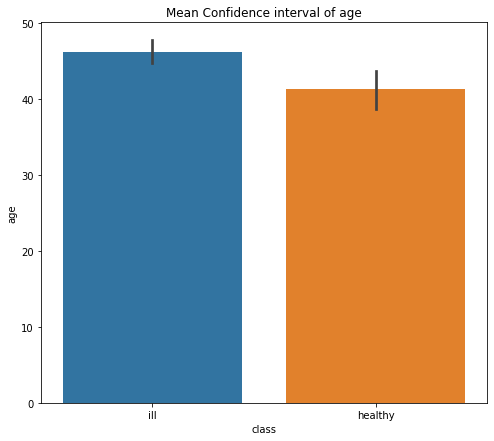

For the feature tb, the mean of the ill population is greater than the healthy population with confidence of 95%


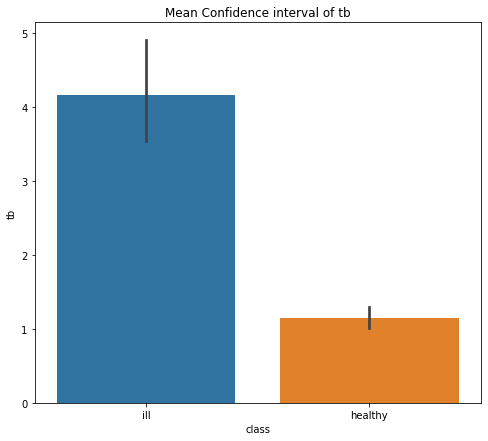

For the feature db, the mean of the ill population is greater than the healthy population with confidence of 95%


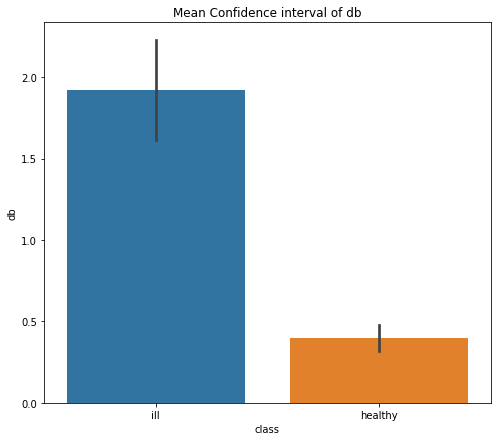

For the feature alkphos, the mean of the ill population is greater than the healthy population with confidence of 95%


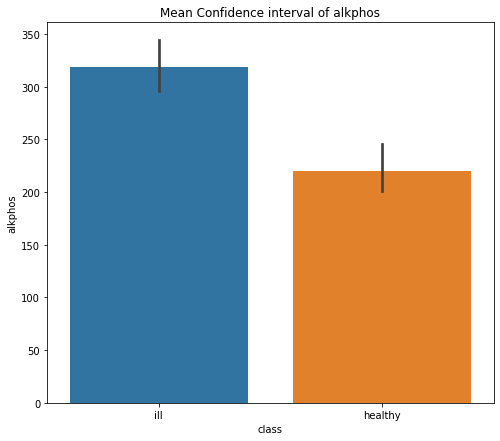

For the feature sgpt, the mean of the ill population is greater than the healthy population with confidence of 95%


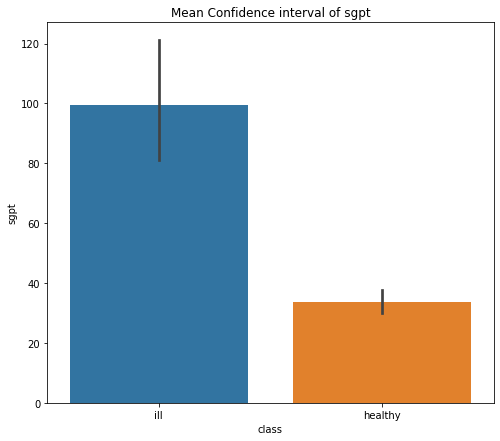

For the feature sgot, the mean of the ill population is greater than the healthy population with confidence of 95%


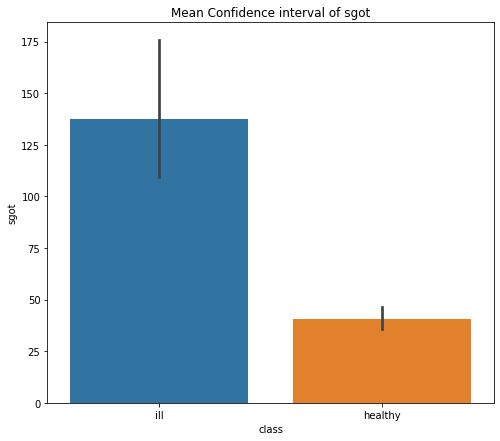

For the feature tp, there is no confidence of 95% that one of the population's mean is greater than the other


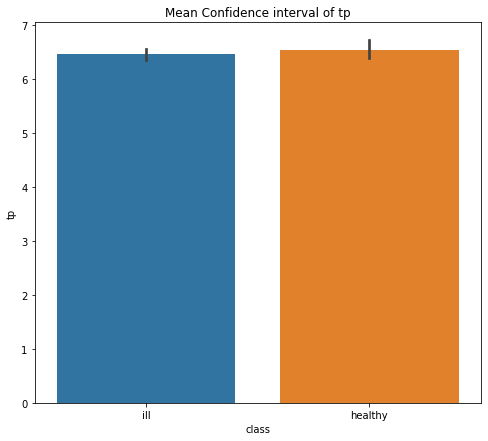

For the feature alb, the mean of the healthy population is greater than the ill population with confidence of 95%


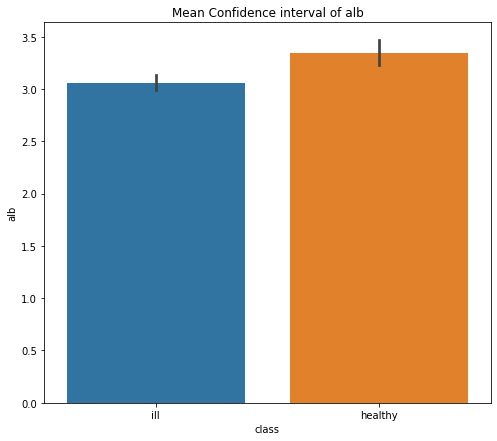

For the feature a/g_ratio, the mean of the healthy population is greater than the ill population with confidence of 95%


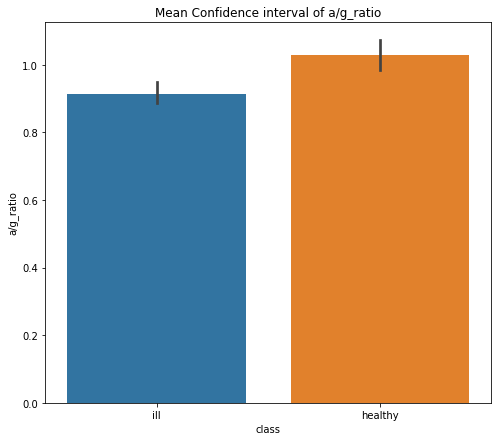

In [69]:
for col in numeric_healthy_df.columns:
    healthy_ci = stats.t.interval(0.95, numeric_healthy_df.shape[0]-1, loc = numeric_healthy_df[col].mean(), scale=stats.sem(numeric_healthy_df[col]))
    ill_ci = stats.t.interval(0.95, numeric_ill_df.shape[0] - 1, loc=numeric_ill_df[col].mean(),scale=stats.sem(numeric_ill_df[col]))

    if healthy_ci[0] > ill_ci[1]:
        print(f"For the feature {col}, the mean of the healthy population is greater than the ill population with confidence of 95%")
    elif ill_ci[0] > healthy_ci[1]:
        print(f"For the feature {col}, the mean of the ill population is greater than the healthy population with confidence of 95%")
    else:
        print(f"For the feature {col}, there is no confidence of 95% that one of the population's mean is greater than the other")
    plt.figure(figsize=(8,7))
    sns.barplot("class", col, data=data)
    plt.title(f"Mean Confidence interval of {col}")
    plt.show()


## Histograms

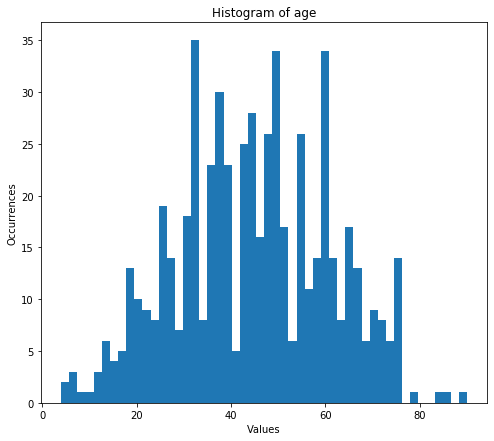

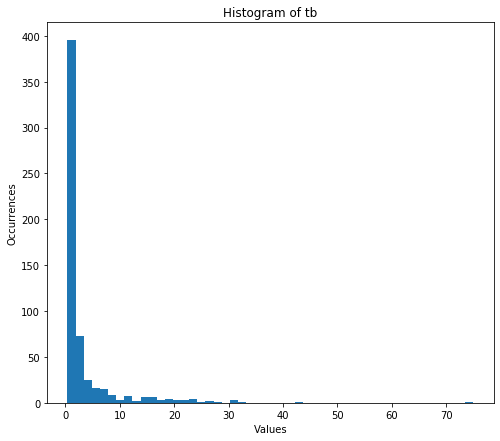

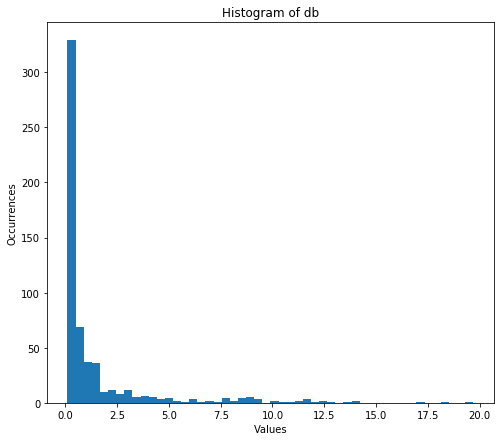

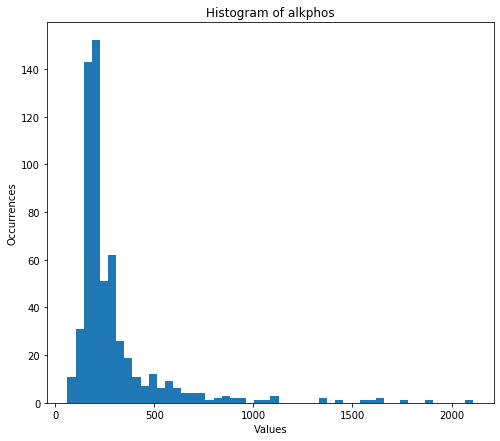

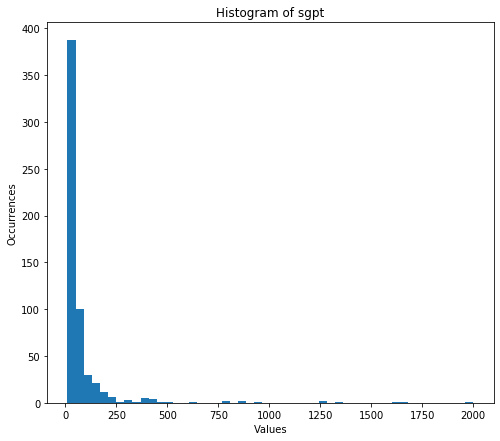

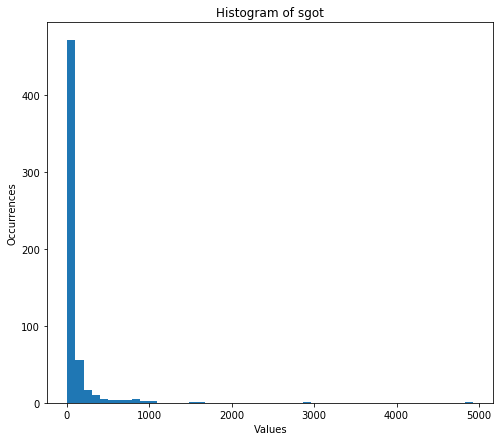

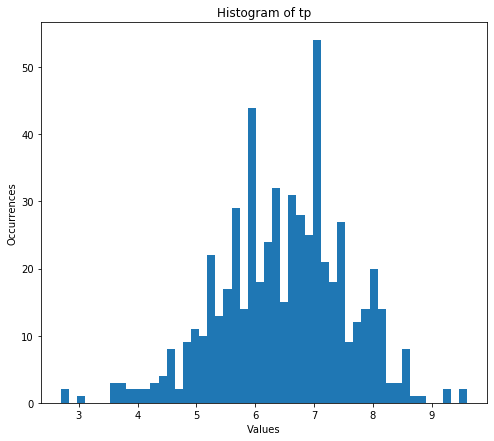

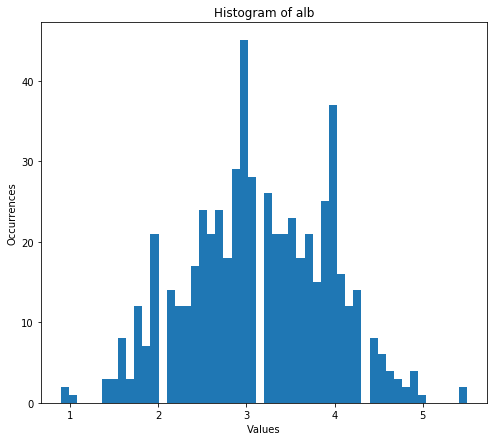

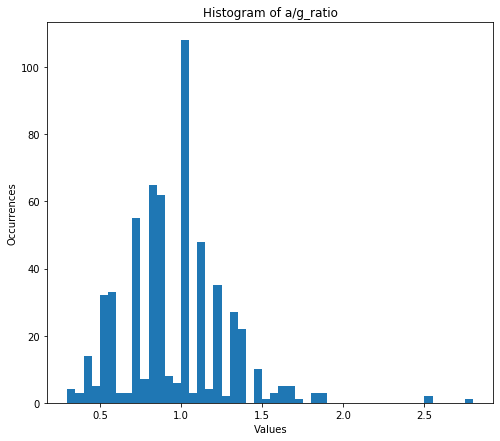

In [70]:
# We will inspect each feature and decide from which common distribution it came from
for col in numeric_healthy_df.columns:
    plt.figure(figsize=(8,7))
    plt.hist(data[col], bins=50)
    plt.title(f"Histogram of {col}")
    plt.xlabel("Values")
    plt.ylabel("Occurrences")
    plt.show()

In [71]:
distribution_dict = {"age": "normal", # we can see that "age" is normally distributed
                     "tb": "exponential", # we can see that "tb" is exponentially distributed
                     "db": "exponential", # we can see that "db" is exponentially distributed
                     "alkphos": "lognormal", # we can see that "alkphos" is log normally distributed
                     "sgpt": "exponential", # we can see that "sgpt" is exponentially distributed
                     "sgot": "exponential", # we can see that "sgot" is exponentially distributed
                     "tp": "normal", # we can see that "age" is normally distributed
                     "alb": "normal", # we can see that "age" is normally distributed
                     "a/g_ratio": "normal"} # we can see that "age" is normally distributed

In [72]:
# A function for plotting a histogram and MLE on the same graph for a specific feature
def plot_histogram_and_mle(data, distribution, feature):
    dist_params = distribution.fit(data)
    mle = distribution(*dist_params)
    x = np.linspace(data.min(), data.max(), 100)
    y = mle.pdf(x)
    plt.figure(figsize=(8, 7))
    plt.plot(x, y, label="MLE")
    plt.hist(data, bins=50, density=True, label="Histogram")
    plt.title(f"Histogram and MLE of {feature}")
    plt.legend()
    plt.show()

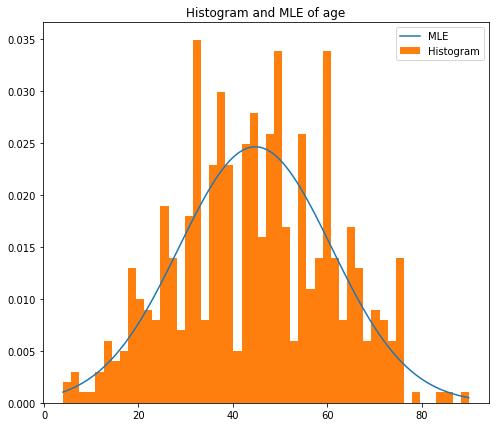

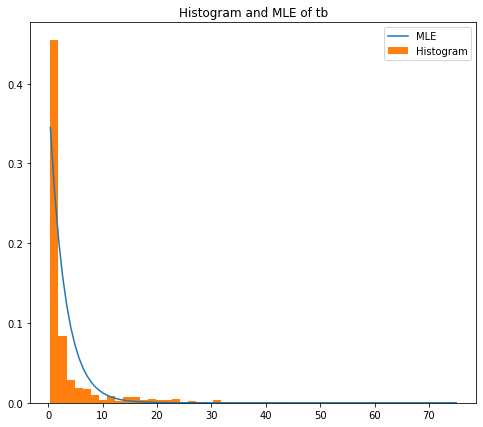

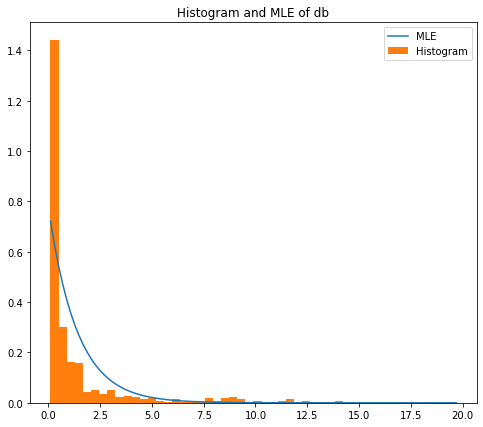

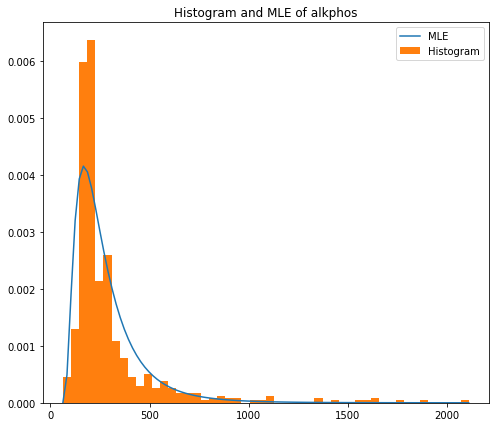

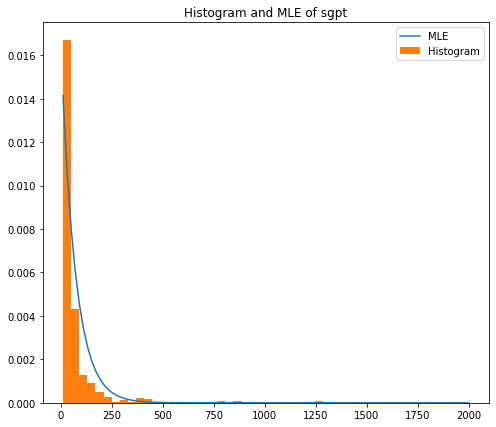

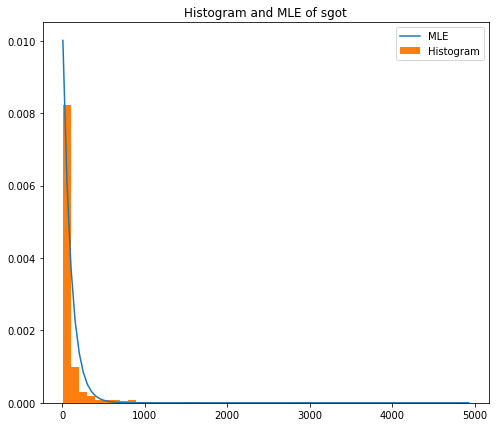

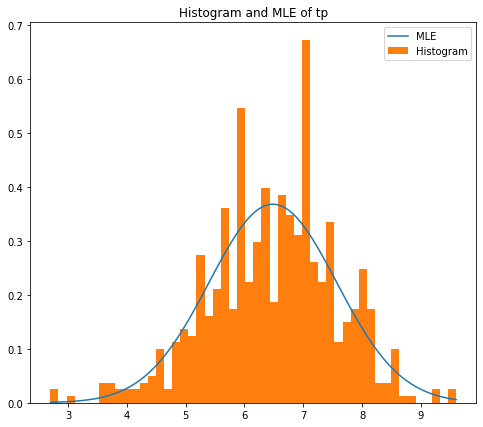

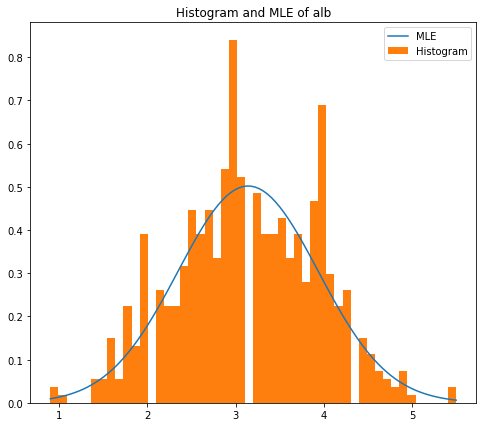

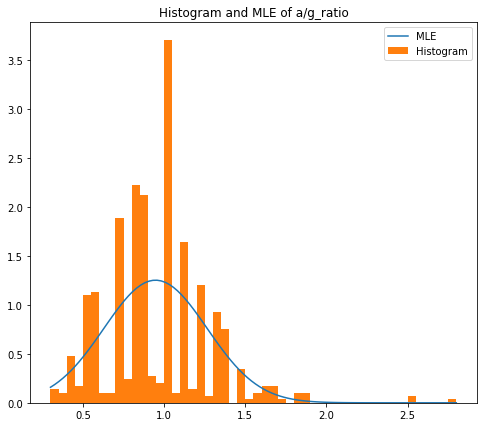

In [73]:
# We will now plot the histogram and MLE of each feature
for col in numeric_healthy_df.columns:
    values = data[col]
    if distribution_dict[col] == "normal":
        distribution = stats.norm
    elif distribution_dict[col] == "lognormal":
        distribution = lognorm
    else:
        distribution = stats.expon

    plot_histogram_and_mle(values, distribution, col)


## Correlations

In [75]:
# We will calculate the features that have significant correlations
numeric_df = data.select_dtypes(["int64", "float64"])
coeffmat = np.zeros((numeric_df.shape[1], numeric_df.shape[1]))
pvalmat = np.zeros_like(coeffmat)
significat_correlative_features = set()

for i, col1 in enumerate(numeric_df.columns):
    for j, col2 in enumerate(numeric_df.columns):
        corrtest = pearsonr(data[col1], data[col2])
        coeffmat[i, j] = corrtest[0]
        pvalmat[i, j] = corrtest[1]
        if np.abs(coeffmat[i,j] >= 0.6) and pvalmat[i, j] <= 0.05 and \
                col1 != col2 and (col2,col1) not in significat_correlative_features:
                    significat_correlative_features.add((col1,col2))
print(f"The following features have siginficant correlations: {significat_correlative_features}")

The following features have siginficant correlations: {('sgpt', 'sgot'), ('alb', 'a/g_ratio'), ('tb', 'db'), ('tp', 'alb')}


sgpt Vs. sgot


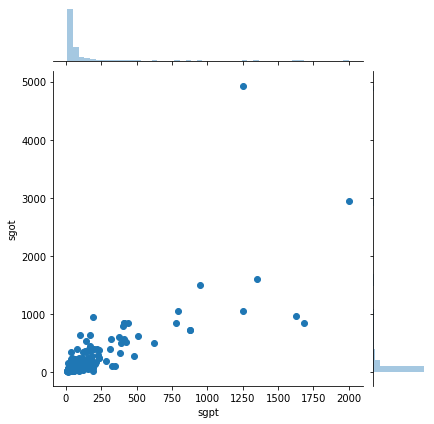

alb Vs. a/g_ratio


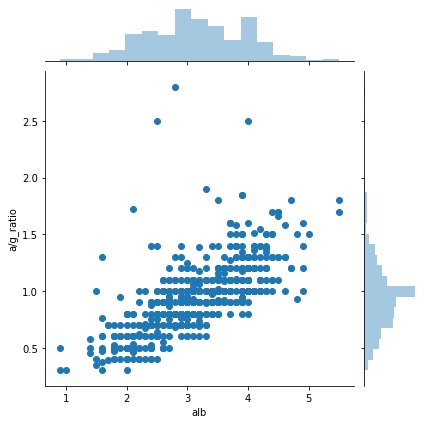

tb Vs. db


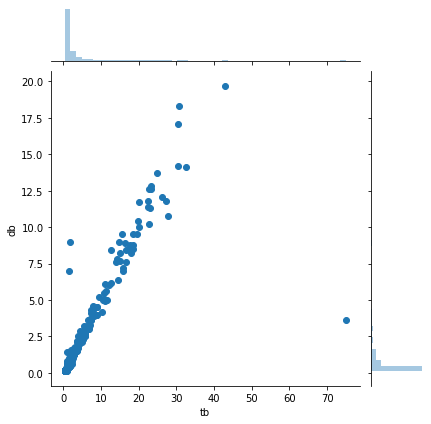

tp Vs. alb


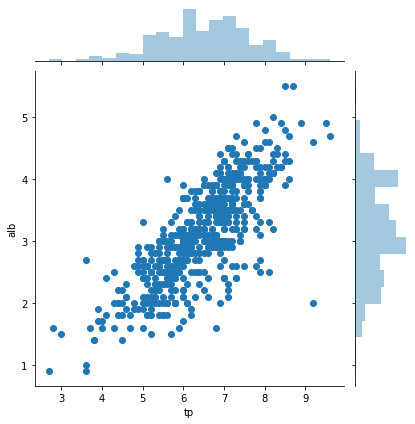

In [76]:
# We will the joint plot with marginal histograms for each pair with significant correlation:
for pair in significat_correlative_features:
    print(f"{pair[0]} Vs. {pair[1]}")
    sns.jointplot(pair[0], pair[1], data)
    plt.show()

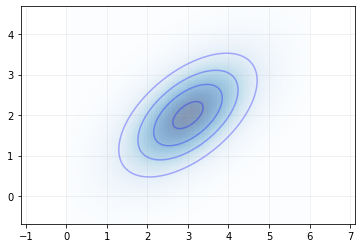

In [2]:
# Example code for bivariate pdfs
from scipy.stats import multivariate_normal as mn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def plot_2d_Gaussian_pdf(means, cov):
    n = 100
    x1 = np.linspace(means[0] - 3 * np.sqrt(cov[0][0]), means[0] + 3 * np.sqrt(cov[0][0]), n)
    x2 = np.linspace(means[1] - 3 * np.sqrt(cov[1][1]), means[1] + 3 * np.sqrt(cov[1][1]), n)
    x1_v, x2_v = np.meshgrid(x1, x2)
    Xgrid = np.vstack([x1_v.ravel(), x2_v.ravel()]).T
    Y = mn.pdf(Xgrid, means, cov)
    fig, ax = plt.subplots()
    ax.pcolorfast(x1, x2, Y.reshape(x1_v.shape), alpha=0.5, cmap='Blues')
    ax.contour(x1_v, x2_v, Y.reshape(x1_v.shape),
               levels=[0.05, 0.1, 0.15, 0.2], alpha=0.3, colors='b')
    ax.axis('equal')
    ax.grid(alpha=0.2)
    plt.show()
    
means = [3, 2]
cov = [[1, 0.5], [0.5, 0.8]]
plot_2d_Gaussian_pdf(means, cov)

### Question 3 - Log Normal (15 points)

Consider Y1 ~ LogNormal(0,0.25) (recall that μ and σ are the mean and std of the underlying normal distribution)  and Y2 ~ LogNormal(0,1).

#### 3.A
Draw a plot of the pdfs for Y1 and Y2 on the same axes, over the x range of [0 10].

### Answer 3.A

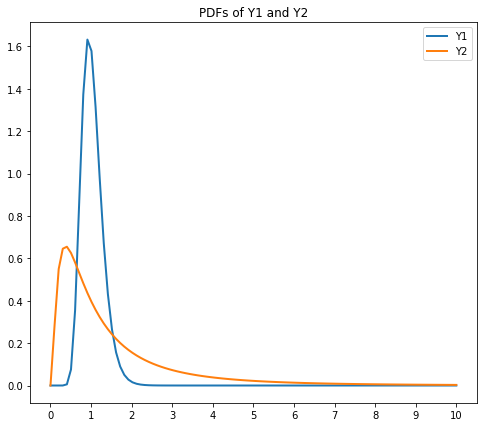

In [42]:
mu_1, sigma_1 = 0, 0.25
mu_2, sigma_2 = 0, 1
y1 = lognorm(s = sigma_1, scale = np.exp(mu_1))
y2 = lognorm(s = sigma_2, scale = np.exp(mu_2))
x = np.linspace(0,10,100)
plt.figure(figsize=(8,7))
plt.plot(x, y1.pdf(x), linewidth = 2, label = "Y1")
plt.plot(x, y2.pdf(x), linewidth = 2, label = "Y2")
plt.xticks(np.arange(11))
plt.title("PDFs of Y1 and Y2")
plt.legend()

#### 3.B
What is E(Y1)? E(Y2)?

### Answer 3.B

In [49]:
expectation_y1 = y1.mean()
expectation_y2 = y2.mean()

print(f"The expectation of Y1 is {np.round(expectation_y1,2)}")
print(f"The expectation of Y2 is {np.round(expectation_y2,2)}")

The expectation of Y1 is 1.03
The expectation of Y2 is 1.65


#### 3.C
What is the probability of Y1 being more than 4 stds larger than its mean?

### Answer 3.C

In [52]:
std_y1 = y1.std()
z1 = (np.log(expectation_y1 + 4 * std_y1) - mu_1) / sigma_1
probability = np.round(1 - stats.norm.cdf(z1), 3)
print(f"The probability of Y1 being more than 4 stds larger than its mean is: {probability}")

The probability of Y1 being more than 4 stds larger than its mean is: 0.002


#### 3.D
What is the probability of Y2 being more than 4 stds larger than its mean?

In [53]:
std_y2 = y2.std()
z2 = (np.log(expectation_y2 + 4 * std_y2) - mu_2) / sigma_2
probability = np.round(1 - stats.norm.cdf(z2), 3)
print(f"The probability of Y2 being more than 4 stds larger than its mean is: {probability}")

The probability of Y2 being more than 4 stds larger than its mean is: 0.01


#### 3.E
What is the IQR of Y1? Of Y2?

In [58]:
z = stats.norm.ppf(0.75)
iqr_y1 = np.exp(mu_1 + stats.norm.ppf(0.75)*std_y1) - np.exp(mu_1 + stats.norm.ppf(0.25)*std_y1)
iqr_y2 = np.exp(mu_2 + stats.norm.ppf(0.75)*std_y2) - np.exp(mu_2 + stats.norm.ppf(0.25)*std_y2)

print(f"The IQR of of Y1 is {np.round(iqr_y1,2)}")
print(f"The IQR of of Y1 is {np.round(iqr_y2,2)}")

The IQR of of Y1 is 0.36
The IQR of of Y1 is 4.06


### Question 4 - CLT for Markov chains (20 points)

In this exercise you will construct trajectories of Markovian dice rolling results in the following way.<br>
The first roll, X0, is Unif(1..6)<br>
After i rolls are determined the i+1st, Xi+1, is drawn according to the row that corresponds to the value of Xi in the matrix T below. <br>
In other words, T is the transition matrix of a Markov chain and the initial distribution is uniform.

\begin{equation*}
T = 
\begin{pmatrix}
0.5 & 0.2 & 0.05 & 0 & 0.05 & 0.2 \\
0.2 & 0.5 & 0.2 & 0.05 & 0 & 0.05 \\
0.05 & 0.2 & 0.5 & 0.2 & 0.05 & 0 \\
0 & 0.05 & 0.2 & 0.5 & 0.2 & 0.05 \\
0.05 & 0 & 0.05 & 0.2 & 0.5 & 0.2 \\
0.2 & 0.05 & 0 & 0.05 & 0.2 & 0.5
\end{pmatrix}
\end{equation*}

#### 4.A
Construct 1000 trajectories, each of length 20.
1. What do you expect the average value of all 20 numbers in a trajectory to be?
2. Compute the average value of each such trajectory. Draw a histogram of the 1000 numbers you received, using 100 bins.
3. What does the distribution look like? What are the empirical mean and the std?

#### 4.B
Construct 1000 trajectories, each of length 2000.
1. What do you expect the average value of all 2000 numbers in a trajectory to be?
2. Compute the average value of each such trajectory. Draw a histogram of the 1000 numbers you received, using 100 bins.
3. What does the distribution look like? What are the empirical mean and the std?

#### 4.C
Draw normal fit curves on your two histograms.

#### 4.D - Bonus
Can you try to formulate a CLT for Markov chains from your findings?